In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [8]:
# Get a random sample of 200 to reduce overplotting
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 200, replace=False)
df_subset = df.loc[sample]

# Simplify the trans variable to 'Automatic' or 'Manual' for their various types
df_subset['trans_type'] = df['trans'].apply(lambda x: x.split()[0])

### Example 1 - Categorical third variable - Shape

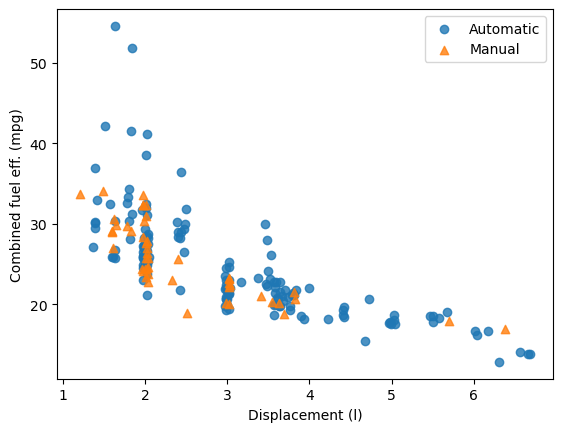

In [10]:
ttype_markers = [['Automatic', 'o'],
                 ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = df_subset[df_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

### Example 2 - Quantitative third variable - Size

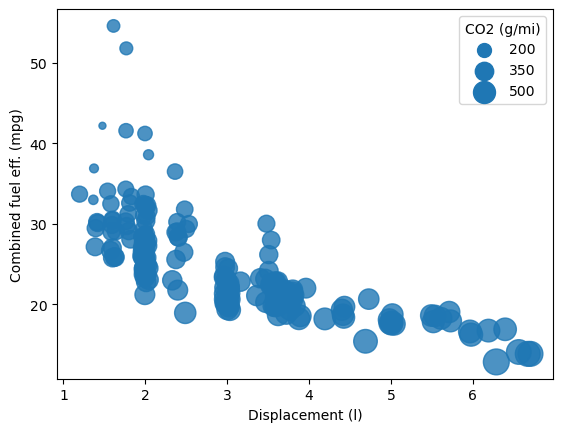

In [12]:
sns.regplot(data=df_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False, scatter_kws={'s': df_subset['co2'] / 2}) # s for size and in scatter_kws dictionary due to using regplot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')

# Create legend
sizes = [200, 350, 500]
base_color = sns.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s / 2, color=base_color)) # empty lists for x and y to avoid plotting anything
plt.legend(legend_obj, sizes, title='CO2 (g/mi)');

### Example 3 - Color, Qualitative color palette for categorical variable

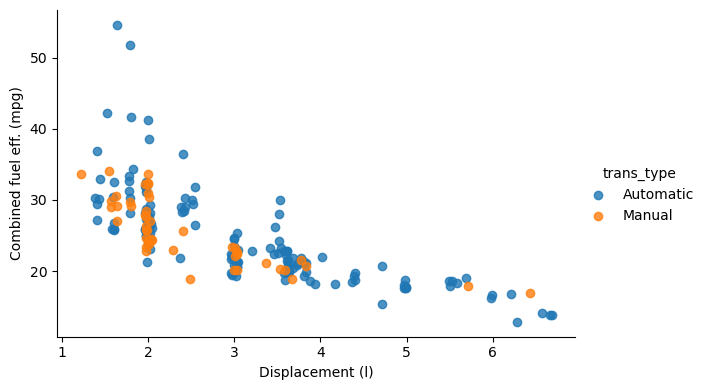

In [14]:
g = sns.FacetGrid(data=df_subset, hue='trans_type', hue_order=['Automatic', 'Manual'], height=4, aspect=1.5)
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

### Example 4 - Color, Sequential color palette for ordered categorical data

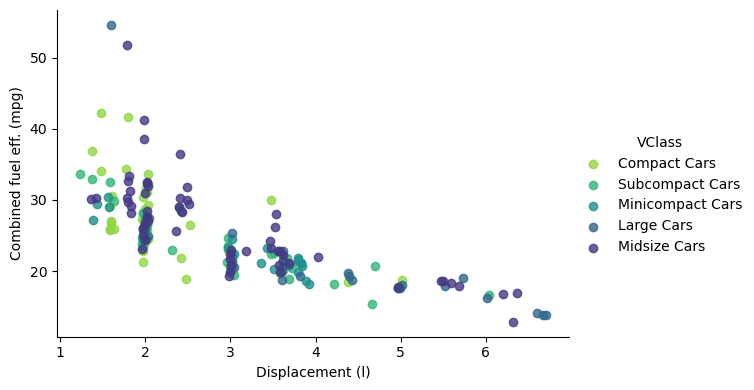

In [15]:
g = sns.FacetGrid(data=df_subset, hue='VClass', height=4, aspect=1.5, palette='viridis_r')
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

#### Example 5 - Color, Sequential color palette for numeric data

`FacetGrid` only expects to facet across categorical variables. Therefore, if we only attempt to change the hue in the above example for a numeric variable, we will get a different color for each unique numeric value in our data.

Instead, we should make a scatter plot and change the color map that is used.

In [ ]:
# Run the below to see why we cannot facet across the co2 variable, a continuous variable
'''
g = sns.FacetGrid(data=df_subset, hue='co2', height=4, aspect=1.5, palette='viridis_r')
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');
'''

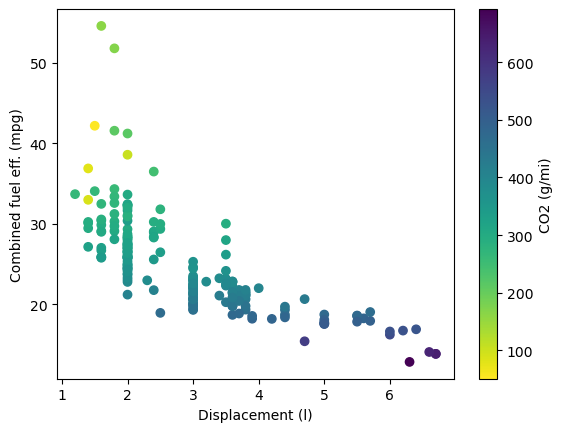

In [17]:
plt.scatter(data=df_subset, x='displ', y='comb', c='co2', cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

### Example 6 - Color, warning against transparency due to new colors

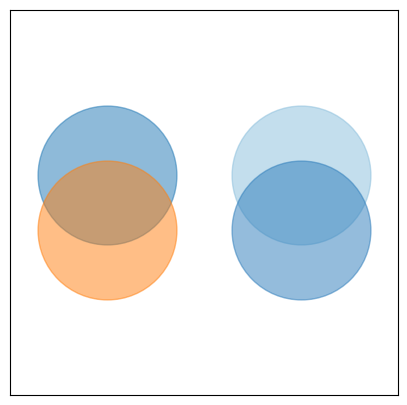

In [55]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, color = sns.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, color = sns.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, color = sns.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, color = sns.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([]);

### Example 7

Look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [20]:
df = pd.read_csv('../../data/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


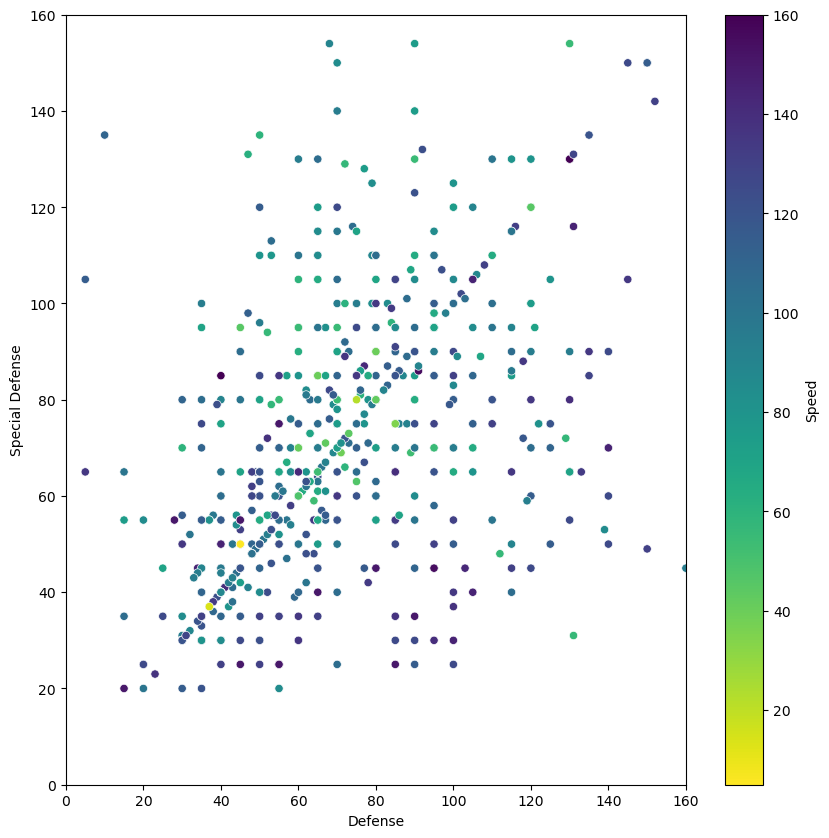

In [61]:
# Option 1 - `seaborn.scatterplot`
plt.figure(figsize=[10,10])
ax = sns.scatterplot(data=df, x='defense', y='special-defense', hue='speed', palette='viridis')

# Edit legend to provide continuous color scale
norm = plt.Normalize(df['speed'].min(), df['speed'].max())
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
ax.get_legend().remove()
plt.colorbar(sm, label='Speed', ax=plt.gca())

# Focus on the center of the distribution
plt.xlim(0, 160)
plt.ylim(0, 160)

plt.xlabel('Defense')
plt.ylabel('Special Defense');

C:\Users\ryanj\AppData\Local\Temp\ipykernel_34692\2609603183.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm, label='Speed')


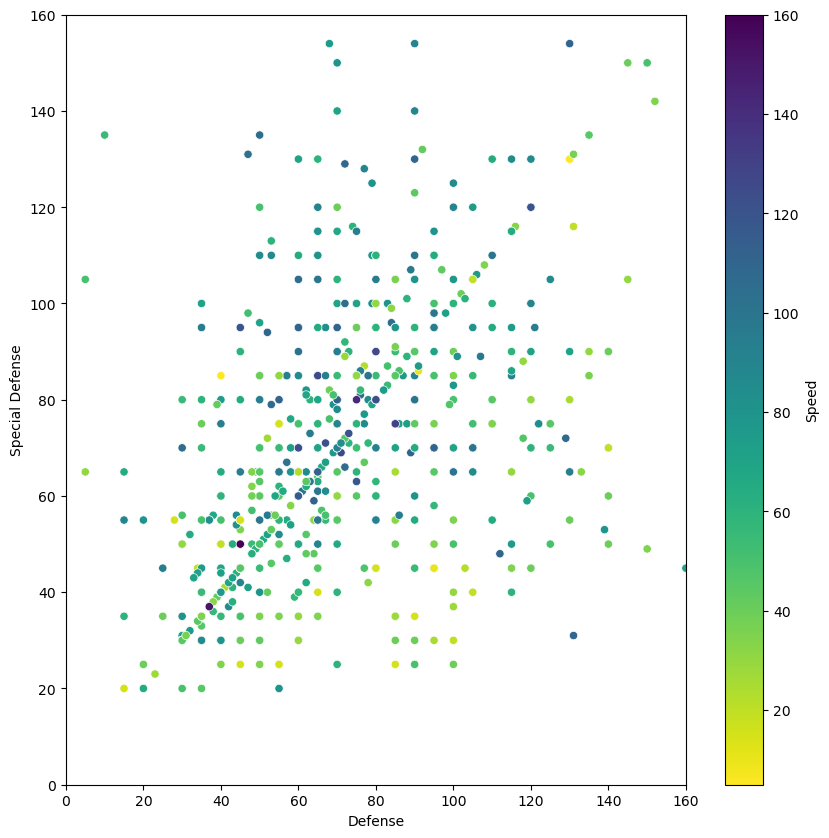

In [41]:
# Option 2 - `plt.scatter`
plt.figure(figsize=[10,10])
plt.scatter(data=df, x='defense', y='special-defense', c='speed', cmap='viridis_r')
plt.colorbar(label='Speed')
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.xlabel('Defense')
plt.ylabel('Special Defense');

### Example 8

How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. Hint: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its .set() method will be vital for adjusting the axis scaling and tick marks. Check the last example in the Seaborn documentation for an example of how the .set() method is used, and the matplotlib documentation of the Axes class for properties that you might want to set.

In [64]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [112]:
# Place all the types in a single column
type_cols = ['type_1', 'type_2']
non_type_cols = df.columns.difference(type_cols)
df_melt = df.melt(id_vars=non_type_cols, value_vars=type_cols, var_name='type_level', value_name='type').dropna()
df_melt = df_melt[df_melt['type'].isin(['fairy', 'dragon'])] # OR df_melt[(df_melt['type'] == 'fairy') | (df_melt['type'] == 'dragon')]

In [89]:
def log_transform(x, base=10, inverse=False):
    """ transformation helper function """
    if not inverse:
        return np.log(x) / np.log(base)
    else:
        return x ** base

In [113]:
df_melt['weight'].describe()

count     92.000000
mean      86.643478
std      154.770876
min        0.100000
25%        6.600000
50%       22.350000
75%       87.500000
max      888.000000
Name: weight, dtype: float64

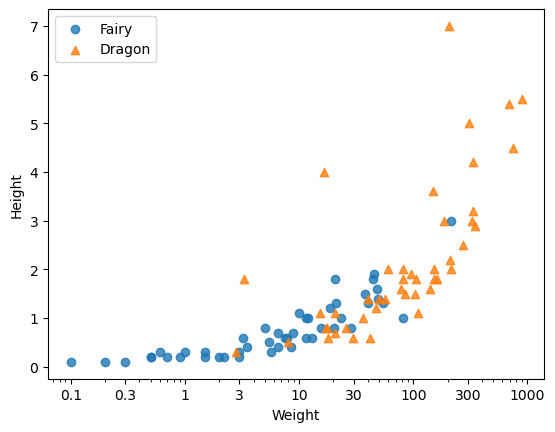

In [114]:
# Option 1 - `seaborn.regplot` with shape and color encodings
ptype_markers = [['fairy', 'o'],
                 ['dragon', '^']]

for ptype, marker in ptype_markers:
    plot_data = df_melt[df_melt['type'] == ptype]
    # plot_data['weight'] = log_transform(plot_data['weight'])
    sns.regplot(data=plot_data, x='weight', y='height', fit_reg=False, marker=marker)

plt.xscale('log')
ticks = [0.1, .3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, [str(t) for t in ticks])


plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(['Fairy', 'Dragon']);

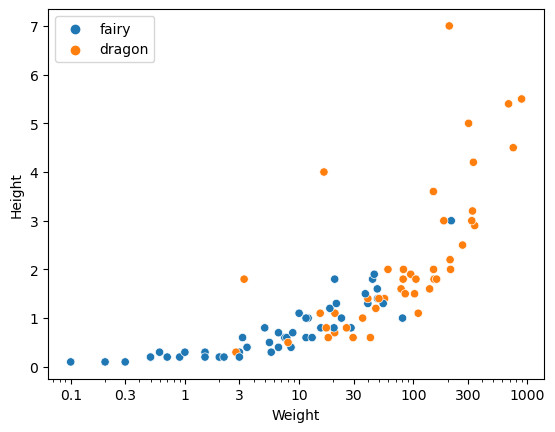

In [116]:
# Option 2 - `seaborn.scatterplot` with only color encoding
sns.scatterplot(data=df_melt, x='weight', y='height', hue='type')

plt.xscale('log')
ticks = [0.1, .3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, [str(t) for t in ticks])

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(title=None);

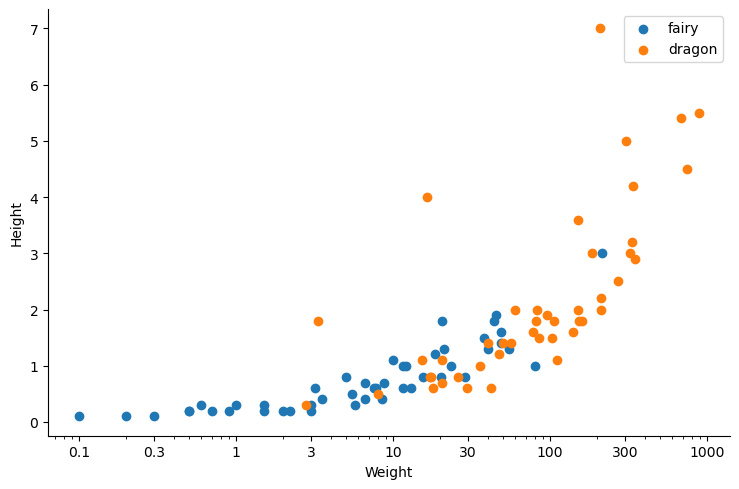

In [129]:
# Option 3 - `seaborn.Facetgrid` with only color encoding
g = sns.FacetGrid(data=df_melt, hue='type', height=5, aspect=1.5)
# g.map(sns.regplot, 'weight', 'height', fit_reg=False)
g.map(plt.scatter, 'weight', 'height')

plt.xscale('log')
ticks = [0.1, .3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, [str(t) for t in ticks])

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(title=None);